In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
df = pd.read_csv('/content/drive/MyDrive/NYPD_ARREST.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [48]:
df.isnull().sum()


ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [12]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [13]:
df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
HOMICIDE-NEGLIGENT-VEHICLE            2
DISRUPTION OF A RELIGIOUS SERV        2
FELONY SEX CRIMES                     2
ADMINISTRATIVE CODES                  1
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Name: ARREST_KEY, Length: 64, dtype: int64

In [14]:
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    46825
B    39957
M    39652
Q    36246
S     7415
Name: ARREST_KEY, dtype: int64

In [15]:
df.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             82041
WHITE HISPANIC                    43081
BLACK HISPANIC                    16501
WHITE                             16373
ASIAN / PACIFIC ISLANDER           9066
UNKNOWN                            2481
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: ARREST_KEY, dtype: int64

In [16]:
df.groupby(['PD_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

PD_DESC
ASSAULT 3                         18384
LARCENY,PETIT FROM OPEN AREAS,    17957
ASSAULT 2,1,UNCLASSIFIED          11945
TRAFFIC,UNCLASSIFIED MISDEMEAN     9040
ROBBERY,OPEN AREA UNCLASSIFIED     8115
                                  ...  
COMPUTER UNAUTH. USE/TAMPER           1
F.C.A. ORDER OF PROTECTION            1
PERJURY 2,1,ETC                       1
CANNABIS SALE, AGGRAVATED             1
NOISE,UNECESSARY                      1
Name: ARREST_KEY, Length: 244, dtype: int64

In [124]:
Sodomy=df[df['PD_DESC'].str.contains('SODOMY')]
Sodomy.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
1227,261732333,01/11/2023,164,SODOMY 3,116.0,SEX CRIMES,PL 1304003,F,Manhattan,25,0,45-64,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1599,268813322,05/25/2023,164,SODOMY 3,116.0,SEX CRIMES,PL 1304003,F,Queens,112,0,25-44,M,WHITE HISPANIC,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758)
1779,262755971,01/31/2023,164,SODOMY 3,116.0,SEX CRIMES,PL 1304003,F,Brooklyn,77,0,<18,M,WHITE,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2481,263702570,02/16/2023,168,SODOMY 1,116.0,SEX CRIMES,PL 1305003,F,Bronx,46,0,<18,M,WHITE HISPANIC,1011755,250279,40.853598,-73.900577,POINT (-73.9005768807295 40.8535983673823)
5605,262675612,01/29/2023,164,SODOMY 3,116.0,SEX CRIMES,PL 1304002,F,Manhattan,5,0,25-44,M,BLACK,984990,200136,40.716012,-73.997332,POINT (-73.9973320301008 40.7160120119955)


In [81]:
grouped_data = df.groupby(['PD_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)
grouped_data

PD_DESC
ASSAULT 3                         18384
LARCENY,PETIT FROM OPEN AREAS,    17957
ASSAULT 2,1,UNCLASSIFIED          11945
TRAFFIC,UNCLASSIFIED MISDEMEAN     9040
ROBBERY,OPEN AREA UNCLASSIFIED     8115
                                  ...  
COMPUTER UNAUTH. USE/TAMPER           1
F.C.A. ORDER OF PROTECTION            1
PERJURY 2,1,ETC                       1
CANNABIS SALE, AGGRAVATED             1
NOISE,UNECESSARY                      1
Name: ARREST_KEY, Length: 244, dtype: int64

I chosed the arrest code "Sodomy" and grouped by Boro, Race , Age
I replaced NaN values with 0
changed borough codes to complete names

In [123]:

borough_mapping = {'B': 'Bronx', 'S': 'Staten Island', 'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens'}
df['ARREST_BORO'] = df['ARREST_BORO'].replace(borough_mapping)


In [131]:

sodomy_arrests = df[df['PD_DESC'].str.contains('SODOMY', case=False, na=False)]

sodomy_borough_race_counts = sodomy_arrests.groupby(['ARREST_BORO', 'PERP_RACE']).size().unstack()

sodomy_borough_race_counts.fillna(0, inplace=True)

sodomy_borough_race_counts.sum()


PERP_RACE
ASIAN / PACIFIC ISLANDER     9.0
BLACK                       59.0
BLACK HISPANIC              14.0
UNKNOWN                      3.0
WHITE                       12.0
WHITE HISPANIC              48.0
dtype: float64

Created a New Data frame with all columns and values
Filtered and drop NaN values
convert the 'ARREST_DATE' column in sodomy_df to a datetime format using the pd.to_datetime function.

In [128]:
sodomy_arrests = df[df['PD_DESC'].str.contains('SODOMY', case=False, na=False)]
df2 = ['ARREST_KEY', 'ARREST_DATE', 'PD_DESC', 'ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP']
sodomy_df = sodomy_arrests[df2]
sodomy_df = sodomy_df.dropna(subset=['ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP'])
sodomy_df['ARREST_DATE'] = pd.to_datetime(sodomy_df['ARREST_DATE'])

Created Visualizations
bar chart for sodomy arrests by precinct
pie chart for sodomy arrests by borough
bar chart for sodomy arrests by age group

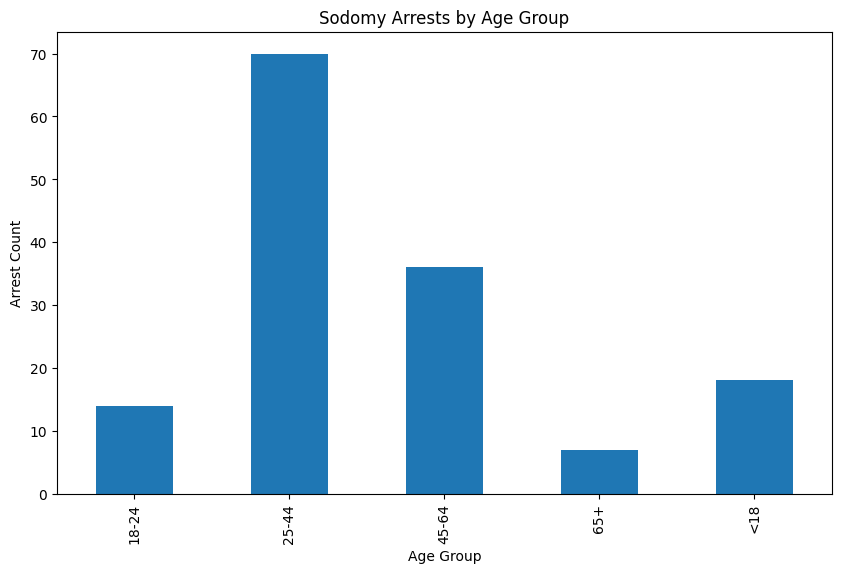

In [84]:
sodomy_df['AGE_GROUP'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Sodomy Arrests by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Arrest Count')
plt.show()

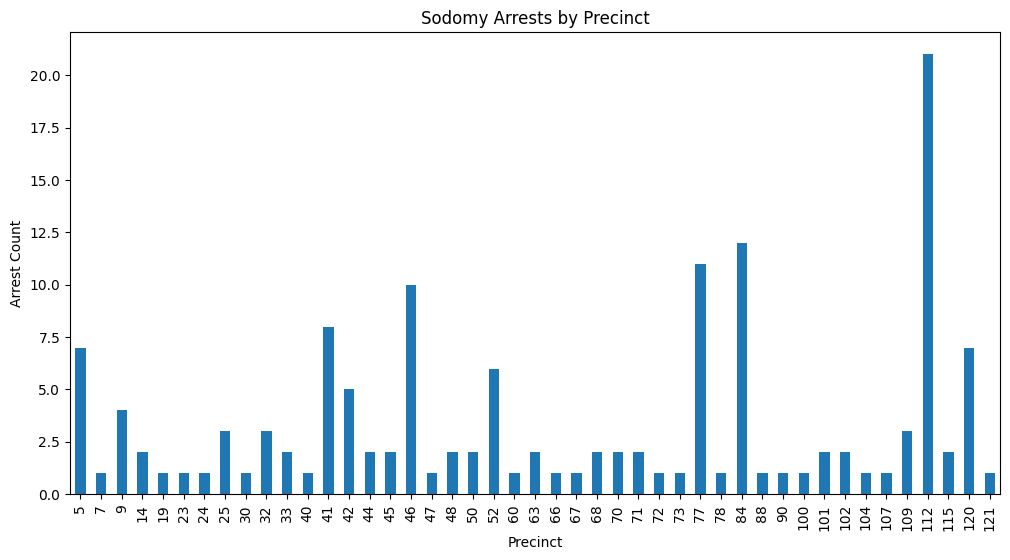

In [82]:
sodomy_df['ARREST_PRECINCT'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Sodomy Arrests by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Arrest Count')
plt.show()

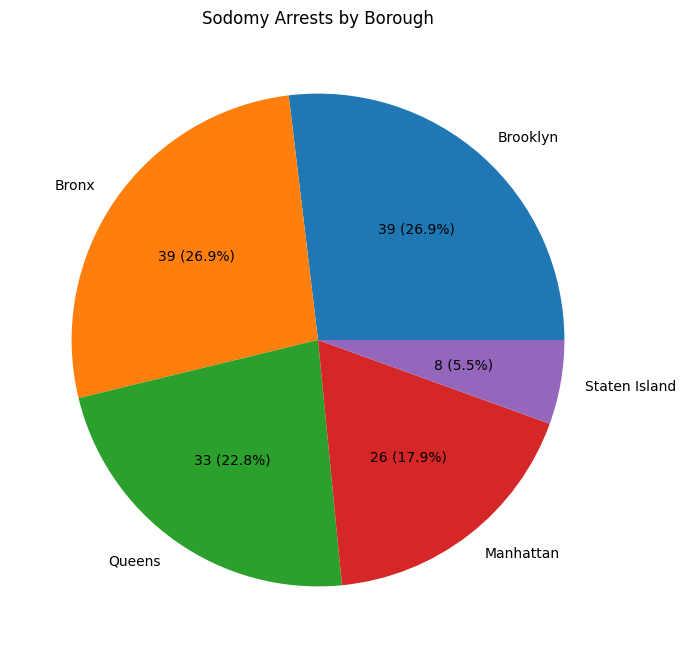

In [129]:
sodomy_df['ARREST_BORO'].value_counts().plot(kind='pie', autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sodomy_df['ARREST_BORO'].value_counts()) / 100, p), figsize=(8, 8))
plt.title('Sodomy Arrests by Borough')
plt.title('Sodomy Arrests by Borough')
plt.ylabel('')
plt.show()

Extract day and month information from 'ARREST_DATE'
Plot arrests by month

the line of code creates a new column 'Day_of_Week' and 'Month' in the sodomy_arrests DataFrame, containing the names of the days of the week corresponding to each arrest date in the 'ARREST_DATE' column.

used
'ARREST_DATE' column in sodomy_df to a datetime format using the pd.to_datetime function.
.dt.month_name to name months
.dt.day_name to name days of the week

<ipython-input-86-2acedac911da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sodomy_arrests['ARREST_DATE'] = pd.to_datetime(sodomy_arrests['ARREST_DATE'])
<ipython-input-86-2acedac911da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sodomy_arrests['Month'] = sodomy_arrests['ARREST_DATE'].dt.month_name()


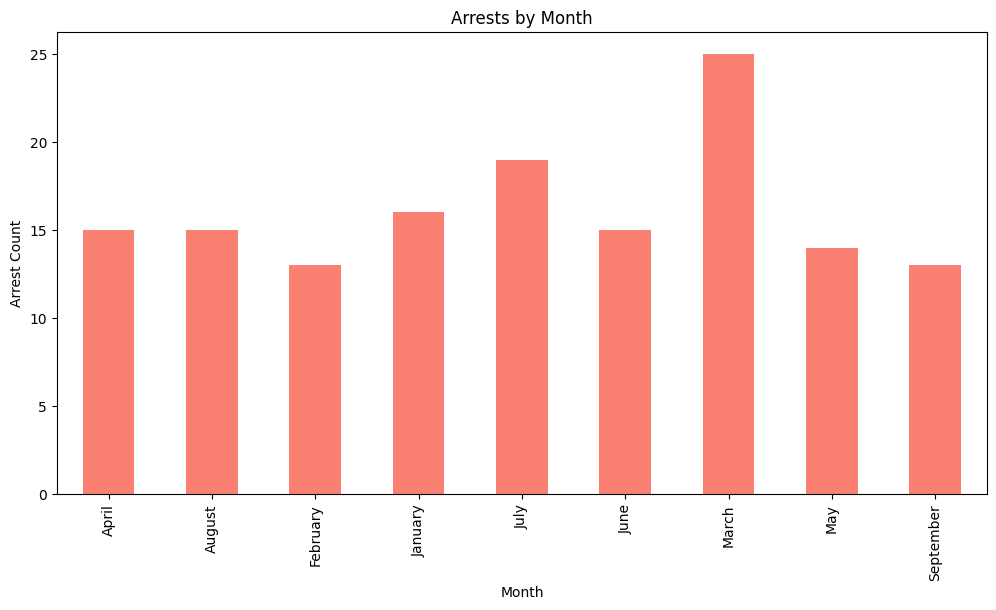

In [86]:
sodomy_arrests['ARREST_DATE'] = pd.to_datetime(sodomy_arrests['ARREST_DATE'])
sodomy_arrests['Month'] = sodomy_arrests['ARREST_DATE'].dt.month_name()
plt.figure(figsize=(12, 6))
sodomy_arrests.groupby('Month').size().plot(kind='bar', color='salmon')
plt.title('Arrests by Month')
plt.xlabel('Month')
plt.ylabel('Arrest Count')
plt.show()


<ipython-input-87-050f0351fb1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sodomy_arrests['Day_of_Week'] = sodomy_arrests['ARREST_DATE'].dt.day_name()


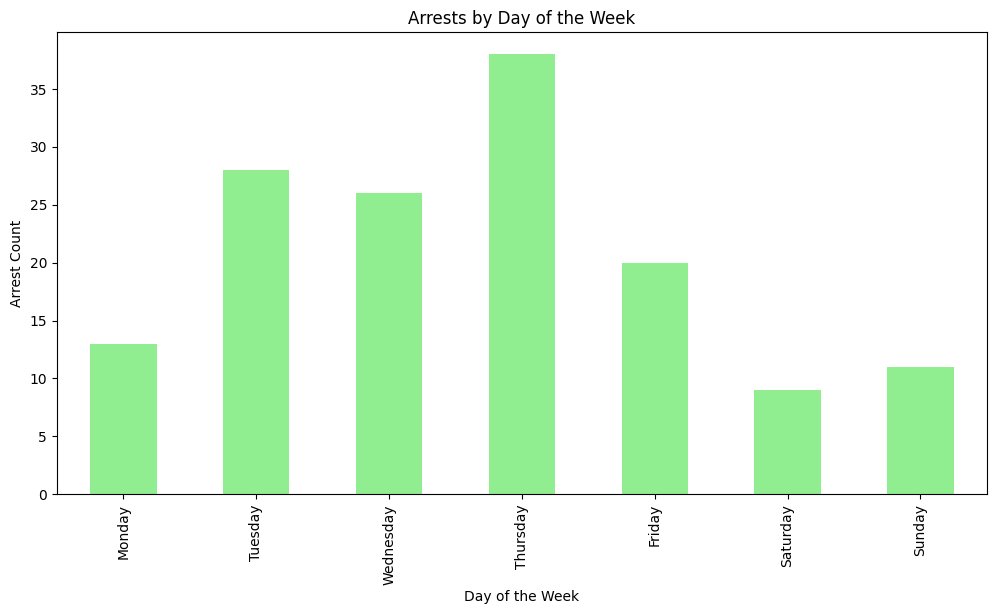

In [87]:
sodomy_arrests['ARREST_DATE'] = pd.to_datetime(sodomy_arrests['ARREST_DATE'])
sodomy_arrests['Day_of_Week'] = sodomy_arrests['ARREST_DATE'].dt.day_name()
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sodomy_arrests['Day_of_Week'].value_counts().loc[day_order].plot(kind='bar', color='lightgreen')
plt.title('Arrests by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Arrest Count')
plt.show()

After scrutinizing the NYPD arrest data, I became intrigued by the occurrence of the term "sodomy," of which I was previously unaware of being categorized by the NYPD. This led me to concentrate my analysis on understanding the implications of this classification and uncovering insights from the data. Sodomy is categorized under 'SEX CRIMES,' and in the year 2023, there were 145 arrests under the sodomy-sex crime classification. Notably, individuals between the ages of 25 and 44 constituted the majority of these arrests. Intriguingly, further examination revealed variations in the frequency of arrests across months and days of the week, with March witnessing the highest number of arrests, and Thursdays emerging as the day with the highest arrest frequency.

Additionally, geographical analysis demonstrated that Brooklyn, Queens, and the Bronx exhibited similar arrest rates, each hovering around 20%, while Manhattan recorded a slightly lower rate at 17%. The precinct with the highest number of arrests was precinct 112 in Forest Hills, Queens. The data raises questions regarding the unknown factors influencing the decision to classify these crimes distinctly from general sex crimes. Further in-depth investigation is required to unravel the intricacies behind this classification discrepancy.